# LSTM on EBAY Dataset

Getting the data

In [1]:
import pandas as pd 
import numpy as np

In [21]:
train_ebay = pd.read_csv("train_ebay.csv")
test_ebay = pd.read_csv("test_ebay.csv")

In [22]:
train_ebay.head()

,date,symbol,open,close,low,high,volume
0,2010-01-04,EBAY,23.719999,23.900000,23.619999,23.979998,22511600.0
1,2010-01-05,EBAY,23.790000,23.650000,23.500000,23.900000,26683100.0
2,2010-01-06,EBAY,23.629998,23.500000,23.440000,23.800000,26368600.0
3,2010-01-07,EBAY,23.490000,23.229998,23.169999,23.490000,25220000.0
4,2010-01-08,EBAY,23.190000,23.509999,23.100000,23.640000,30484000.0


Data Manipulation

In [23]:
#Sorting the dataset based on the date column
train_ebay = train_ebay.sort_values("date")
test_ebay  = test_ebay.sort_values("date")

#getting the dates in particular format
train_ebay['date'] = train_ebay['date'].astype('datetime64[D]')
test_ebay['date'] = test_ebay['date'].astype('datetime64[D]')

In [24]:
#getting the independent and dependent datasets
Y_train = train_ebay["close"]
Y_test = test_ebay["close"]


X_train = train_ebay.drop(["symbol" , "close" ] , axis = 1)
X_test = test_ebay.drop(["symbol" , "close" ] , axis = 1)

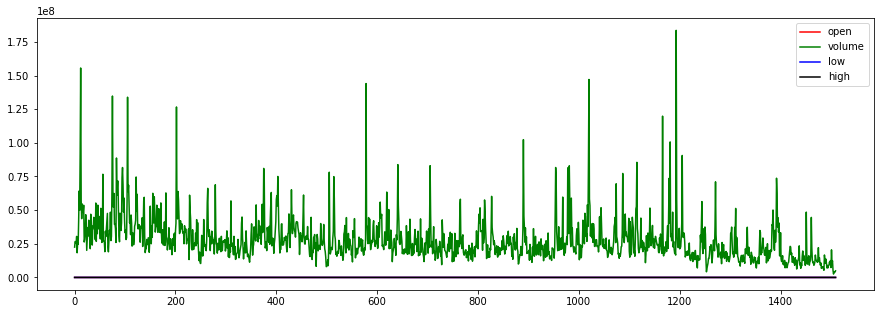

In [25]:
#Plotting the data to know some insights
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5));
plt.plot(X_train.open.values, color='red', label='open')
plt.plot(X_train.volume.values, color='green', label='volume')
plt.plot(X_train.low.values, color='blue', label='low')
plt.plot(X_train.high.values, color='black', label='high')
plt.legend(loc='best')
plt.show()

In [7]:
#Volume column does not seem to be impactful, hence dropping it
X_train = X_train.drop("volume" , axis =1)
X_test = X_test.drop("volume" , axis =1)

#Getting the date column as a feature as well
X_train['date'] = X_train['date'].dt.strftime('%Y%m%d').astype(float)
X_test['date'] = X_test['date'].dt.strftime('%Y%m%d').astype(float)

In [8]:
#Normalizing the data 
from sklearn.preprocessing import MinMaxScaler

def normalize_data(data):
    min_max_scaler = MinMaxScaler()
    data["open"] = min_max_scaler.fit_transform(data.open.values.reshape(-1,1))
    data["low"] = min_max_scaler.fit_transform(data.low.values.reshape(-1,1))
    data["high"] = min_max_scaler.fit_transform(data.high.values.reshape(-1,1))
    data["date"] = min_max_scaler.fit_transform(data.date.values.reshape(-1,1))
    
    return data

In [9]:
X_train = normalize_data(X_train)
X_test = normalize_data(X_test)

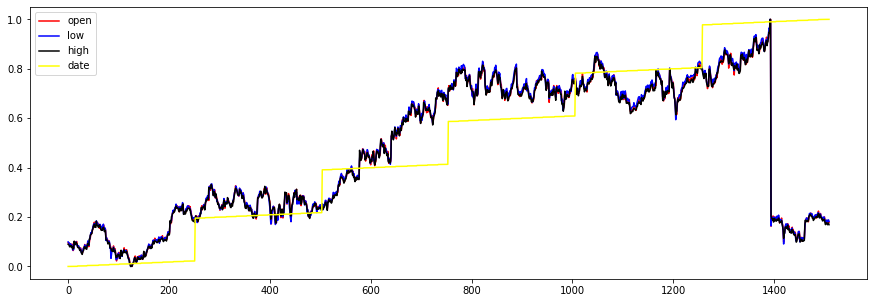

In [10]:
#Plotting again
plt.figure(figsize=(15, 5));
plt.plot(X_train.open.values, color='red', label='open')
plt.plot(X_train.low.values, color='blue', label='low')
plt.plot(X_train.high.values, color='black', label='high')
plt.plot(X_train.date.values, color='yellow', label='date')
plt.legend(loc='best')
plt.show()

In [11]:
#Data looks good. Checking the shape
print(X_train.shape , Y_train.shape)
print("="*50)
print(X_test.shape, Y_test.shape)

(1510, 4) (1510,)
(252, 4) (252,)


# LSTM modeling

In [12]:
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.layers import LSTM , GRU
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam 

C:\Users\Shouvik\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
#getting the datasets into favourable input formats
X_train = X_train.values.reshape(X_train.shape[0] , 1 , X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0] , 1 , X_test.shape[1])

In [14]:
# create the model
#After several trial, this model setup seems to work best 

model = Sequential()

model.add(GRU(256, input_shape = (1 , 4) , return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(256))
model.add(Dropout(0.4))

#model.add(LSTM(128))
#model.add(Dropout(0.4))

model.add(Dense(64 ,  activation = 'relu'))
model.add(Dense(1))

print(model.summary())

W0408 20:24:34.371799 24016 deprecation_wrapper.py:119] From C:\Users\Shouvik\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0408 20:24:34.410062 24016 deprecation_wrapper.py:119] From C:\Users\Shouvik\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0408 20:24:34.415637 24016 deprecation_wrapper.py:119] From C:\Users\Shouvik\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0408 20:24:34.781991 24016 deprecation_wrapper.py:119] From C:\Users\Shouvik\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0408 20:24:34.792473 24016 deprecatio

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 1, 256)            200448    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 742,273
Trainable params: 742,273
Non-trainable params: 0
_________________________________________________________________
None

In [15]:
#setting the metrics and the learning rate
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.001) , metrics = ['mean_squared_error'])

W0408 20:24:35.315098 24016 deprecation_wrapper.py:119] From C:\Users\Shouvik\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [16]:
#Training for 150 epoches with a batch size of 128 in each epoch 
model_lstm  = model.fit(X_train, Y_train , epochs=150 , batch_size = 128 , validation_data = (X_test, Y_test))

W0408 20:24:36.036055 24016 deprecation.py:323] From C:\Users\Shouvik\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0408 20:24:38.501896 24016 deprecation_wrapper.py:119] From C:\Users\Shouvik\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 1510 samples, validate on 252 samples
Epoch 1/150
1510/1510 [==============================] - 9s 6ms/step - loss: 1867.5554 - mean_squared_error: 1867.5554 - val_loss: 705.1463 - val_mean_squared_error: 705.1463
Epoch 2/150
1510/1510 [==============================] - 0s 197us/step - loss: 1723.0273 - mean_squared_error: 1723.0273 - val_loss: 531.5537 - val_mean_squared_error: 531.5537
Epoch 3/150
1510/1510 [==============================] - 0s 243us/step - loss: 1195.8602 - mean_squared_error: 1195.8602 - val_loss: 140.1310 - val_mean_squared_error: 140.1310
Epoch 4/150
1510/1510 [==============================] - 0s 283us/step - loss: 295.4643 - mean_squared_error: 295.4643 - val_loss: 351.6871 - val_mean_squared_error: 351.6871
Epoch 5/150
1510/1510 [==============================] - 0s 292us/step - loss: 77.2634 - mean_squared_error: 77.2634 - val_loss: 500.8473 - val_mean_squared_error: 500.8473
Epoch 6/150
1510/1510 [==============================] - 0s 295us/step - los

1510/1510 [==============================] - 0s 251us/step - loss: 8.2788 - mean_squared_error: 8.2788 - val_loss: 292.5236 - val_mean_squared_error: 292.5236
Epoch 49/150
1510/1510 [==============================] - 0s 253us/step - loss: 8.4032 - mean_squared_error: 8.4032 - val_loss: 287.3631 - val_mean_squared_error: 287.3631
Epoch 50/150
1510/1510 [==============================] - 0s 253us/step - loss: 8.8371 - mean_squared_error: 8.8371 - val_loss: 297.0573 - val_mean_squared_error: 297.0573
Epoch 51/150
1510/1510 [==============================] - 0s 254us/step - loss: 8.5820 - mean_squared_error: 8.5820 - val_loss: 285.5725 - val_mean_squared_error: 285.5725
Epoch 52/150
1510/1510 [==============================] - 0s 252us/step - loss: 8.4368 - mean_squared_error: 8.4368 - val_loss: 301.8554 - val_mean_squared_error: 301.8554
Epoch 53/150
1510/1510 [==============================] - 0s 250us/step - loss: 8.3573 - mean_squared_error: 8.3573 - val_loss: 288.5228 - val_mean_squar

Epoch 96/150
1510/1510 [==============================] - 0s 252us/step - loss: 8.8078 - mean_squared_error: 8.8078 - val_loss: 300.5048 - val_mean_squared_error: 300.5048
Epoch 97/150
1510/1510 [==============================] - 0s 245us/step - loss: 7.5362 - mean_squared_error: 7.5362 - val_loss: 300.9405 - val_mean_squared_error: 300.9405
Epoch 98/150
1510/1510 [==============================] - 0s 245us/step - loss: 7.8949 - mean_squared_error: 7.8949 - val_loss: 288.2222 - val_mean_squared_error: 288.2222
Epoch 99/150
1510/1510 [==============================] - 0s 256us/step - loss: 7.9664 - mean_squared_error: 7.9664 - val_loss: 285.8168 - val_mean_squared_error: 285.8168
Epoch 100/150
1510/1510 [==============================] - 0s 249us/step - loss: 7.9458 - mean_squared_error: 7.9458 - val_loss: 290.3595 - val_mean_squared_error: 290.3595
Epoch 101/150
1510/1510 [==============================] - 0s 250us/step - loss: 8.0826 - mean_squared_error: 8.0826 - val_loss: 303.2644 -

In [17]:
#getting the model MSE and RMS value
import math 

def model_score(model, X_train, Y_train, X_test, Y_test):
    trainScore = model.evaluate(X_train, Y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = model.evaluate(X_test, Y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(model, X_train, Y_train, X_test, Y_test)

Train Score: 0.74816 MSE (0.86 RMSE)
Test Score: 284.45865 MSE (16.87 RMSE)


(0.7481629539700534, 284.45864940824964)

In [18]:
y_pred = model.predict(X_test)

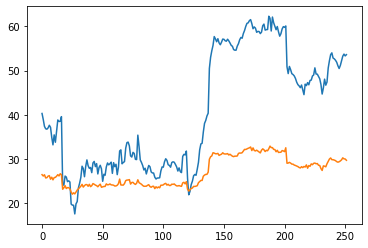

In [19]:
#Plotting the actual vs the predicted closing price values
import matplotlib.pyplot as plt
plt.plot(y_pred)
plt.plot(Y_test)

# LSTM model with slight changes in the dataset

Getting the data again but this time will make slight adjustments 

In [3]:
train_ebay.head()

,date,symbol,open,close,low,high,volume
0,2010-01-04,EBAY,23.719999,23.900000,23.619999,23.979998,22511600.0
1,2010-01-05,EBAY,23.790000,23.650000,23.500000,23.900000,26683100.0
2,2010-01-06,EBAY,23.629998,23.500000,23.440000,23.800000,26368600.0
3,2010-01-07,EBAY,23.490000,23.229998,23.169999,23.490000,25220000.0
4,2010-01-08,EBAY,23.190000,23.509999,23.100000,23.640000,30484000.0


In [4]:
train_ebay = train_ebay.sort_values("date")
test_ebay  = test_ebay.sort_values("date")

train_ebay['date'] = train_ebay['date'].astype('datetime64[D]')
test_ebay['date'] = test_ebay['date'].astype('datetime64[D]')

In [5]:
#Dropping all columns except the date and the opening price
train_ebay = train_ebay.drop(["symbol"  , "low" , "high" , "volume" ] , axis = 1)
test_ebay = test_ebay.drop(["symbol" , "low" , "high" , "volume"] , axis = 1)

In [6]:
#idea - We will take date, opening price and for a particular day, it's past 2 days closing values

def get_new_data(dataset):
    
    #last day closing price
    
    dataset.loc[0,'close_1'] = dataset.loc[0,'open']
    
    for i in range(1,len(dataset)):
        dataset.loc[i,'close_1'] = dataset.loc[i-1,'close']
    
    #Last to last day closing price
    
    dataset.loc[0,'close_2'] = dataset.loc[0,'open']
    dataset.loc[1,'close_2'] = dataset.loc[1,'open']
    
    for i in range(2,len(dataset)):
        dataset.loc[i,'close_2'] = dataset.loc[i-2,'close']
        
    return dataset

In [7]:
train_ebay = get_new_data(train_ebay)
test_ebay = get_new_data(test_ebay)

In [8]:
train_ebay.head()

,date,open,close,close_1,close_2
0,2010-01-04,23.719999,23.900000,23.719999,23.719999
1,2010-01-05,23.790000,23.650000,23.900000,23.790000
2,2010-01-06,23.629998,23.500000,23.650000,23.900000
3,2010-01-07,23.490000,23.229998,23.500000,23.650000
4,2010-01-08,23.190000,23.509999,23.229998,23.500000


In [9]:
#Getting the dependent and independent datasets
Y_train = train_ebay["close"]
Y_test = test_ebay["close"]

X_train = train_ebay.drop(["close"] , axis = 1)
X_test = test_ebay.drop(["close"] , axis = 1)

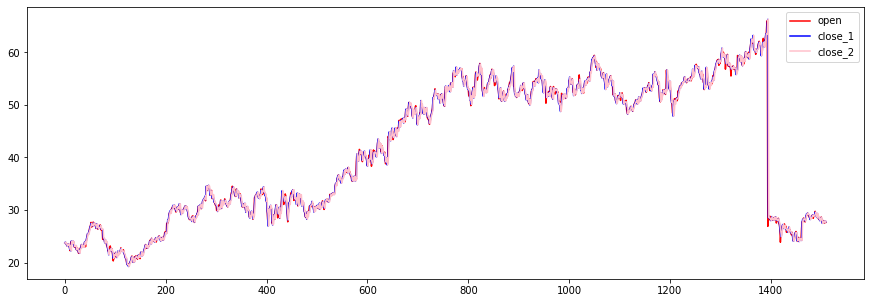

In [11]:
#Plotting to check everything's working fine

plt.figure(figsize=(15, 5));
plt.plot(X_train.open.values, color='red', label='open')
plt.plot(X_train.close_1.values, color='blue', label='close_1')
plt.plot(X_train.close_2.values, color='pink', label='close_2')
plt.legend(loc='best')
plt.show()

In [12]:
#getting the date as a feature
X_train['date'] = X_train['date'].dt.strftime('%Y%m%d').astype(float)
X_test['date'] = X_test['date'].dt.strftime('%Y%m%d').astype(float)

In [13]:
#Normalizing the data again

def normalize_data(data):
    min_max_scaler = MinMaxScaler()
    data["open"] = min_max_scaler.fit_transform(data.open.values.reshape(-1,1))
    data["close_1"] = min_max_scaler.fit_transform(data.close_1.values.reshape(-1,1))
    data["close_2"] = min_max_scaler.fit_transform(data.close_2.values.reshape(-1,1))
    data["date"] = min_max_scaler.fit_transform(data.date.values.reshape(-1,1))
    
    return data

In [14]:
X_train = normalize_data(X_train)
X_test = normalize_data(X_test)

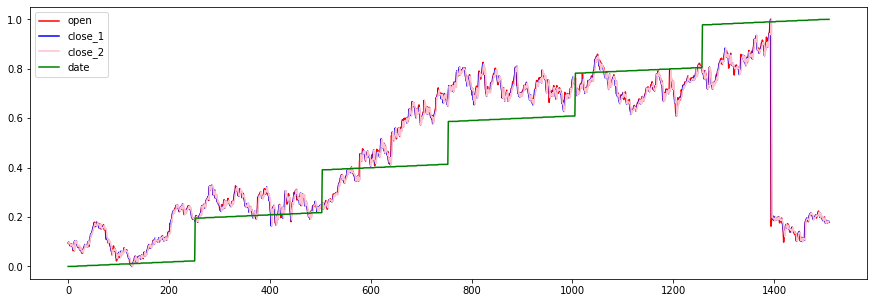

In [15]:
plt.figure(figsize=(15, 5));
plt.plot(X_train.open.values, color='red', label='open')
plt.plot(X_train.close_1.values, color='blue', label='close_1')
plt.plot(X_train.close_2.values, color='pink', label='close_2')
plt.plot(X_train.date.values, color='green', label='date')
plt.legend(loc='best')
plt.show()

In [16]:
#Everything looks good. Checking the shape
print(X_train.shape , Y_train.shape)
print("="*50)
print(X_test.shape, Y_test.shape)

(1510, 4) (1510,)
(252, 4) (252,)


__LSTM Model__

In [19]:
X_train = X_train.values.reshape(X_train.shape[0] , 1 , X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0] , 1 , X_test.shape[1])

In [21]:
# create the model
#Setting the best set of parameters

model = Sequential()

model.add(GRU(256, input_shape = (1 , 4) , return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(256))
model.add(Dropout(0.4))

#model.add(LSTM(128))
#model.add(Dropout(0.4))

model.add(Dense(64 ,  activation = 'relu'))
model.add(Dense(1))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 1, 256)            200448    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 742,273
Trainable params: 742,273
Non-trainable params: 0
_________________________________________________________________
None

In [23]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.001) , metrics = ['mean_squared_error'])

In [24]:
model_lstm  = model.fit(X_train, Y_train , epochs=150 , batch_size = 128 , validation_data = (X_test, Y_test))

W0412 00:05:14.233846 34176 deprecation.py:323] From C:\Users\Shouvik\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0412 00:05:14.914170 34176 deprecation_wrapper.py:119] From C:\Users\Shouvik\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 1510 samples, validate on 252 samples
Epoch 1/150
1510/1510 [==============================] - 5s 3ms/step - loss: 1868.6638 - mean_squared_error: 1868.6638 - val_loss: 706.9381 - val_mean_squared_error: 706.9381
Epoch 2/150
1510/1510 [==============================] - 0s 85us/step - loss: 1729.8977 - mean_squared_error: 1729.8977 - val_loss: 539.6351 - val_mean_squared_error: 539.6351
Epoch 3/150
1510/1510 [==============================] - 0s 94us/step - loss: 1218.8272 - mean_squared_error: 1218.8272 - val_loss: 155.7475 - val_mean_squared_error: 155.7475
Epoch 4/150
1510/1510 [==============================] - 0s 84us/step - loss: 338.8253 - mean_squared_error: 338.8253 - val_loss: 281.0988 - val_mean_squared_error: 281.0988
Epoch 5/150
1510/1510 [==============================] - 0s 94us/step - loss: 73.5341 - mean_squared_error: 73.5341 - val_loss: 550.5524 - val_mean_squared_error: 550.5524
Epoch 6/150
1510/1510 [==============================] - 0s 92us/step - loss: 35

1510/1510 [==============================] - 0s 95us/step - loss: 9.5216 - mean_squared_error: 9.5216 - val_loss: 295.2350 - val_mean_squared_error: 295.2350
Epoch 49/150
1510/1510 [==============================] - 0s 94us/step - loss: 9.2007 - mean_squared_error: 9.2007 - val_loss: 290.3518 - val_mean_squared_error: 290.3518
Epoch 50/150
1510/1510 [==============================] - 0s 91us/step - loss: 8.9991 - mean_squared_error: 8.9991 - val_loss: 286.0102 - val_mean_squared_error: 286.0102
Epoch 51/150
1510/1510 [==============================] - 0s 93us/step - loss: 9.8404 - mean_squared_error: 9.8404 - val_loss: 284.7974 - val_mean_squared_error: 284.7974
Epoch 52/150
1510/1510 [==============================] - 0s 92us/step - loss: 9.0577 - mean_squared_error: 9.0577 - val_loss: 288.6906 - val_mean_squared_error: 288.6906
Epoch 53/150
1510/1510 [==============================] - 0s 92us/step - loss: 8.9759 - mean_squared_error: 8.9759 - val_loss: 279.0435 - val_mean_squared_err

Epoch 96/150
1510/1510 [==============================] - 0s 94us/step - loss: 8.5156 - mean_squared_error: 8.5156 - val_loss: 288.0802 - val_mean_squared_error: 288.0802
Epoch 97/150
1510/1510 [==============================] - 0s 93us/step - loss: 8.1611 - mean_squared_error: 8.1611 - val_loss: 293.6642 - val_mean_squared_error: 293.6642
Epoch 98/150
1510/1510 [==============================] - 0s 78us/step - loss: 9.1212 - mean_squared_error: 9.1212 - val_loss: 272.8742 - val_mean_squared_error: 272.8742
Epoch 99/150
1510/1510 [==============================] - 0s 93us/step - loss: 8.6653 - mean_squared_error: 8.6653 - val_loss: 283.9156 - val_mean_squared_error: 283.9156
Epoch 100/150
1510/1510 [==============================] - 0s 88us/step - loss: 8.5486 - mean_squared_error: 8.5486 - val_loss: 293.5462 - val_mean_squared_error: 293.5462
Epoch 101/150
1510/1510 [==============================] - 0s 93us/step - loss: 8.9259 - mean_squared_error: 8.9259 - val_loss: 281.9161 - val_m

1510/1510 [==============================] - 0s 89us/step - loss: 8.1697 - mean_squared_error: 8.1697 - val_loss: 296.0360 - val_mean_squared_error: 296.0360
Epoch 144/150
1510/1510 [==============================] - 0s 81us/step - loss: 8.4305 - mean_squared_error: 8.4305 - val_loss: 298.4552 - val_mean_squared_error: 298.4552
Epoch 145/150
1510/1510 [==============================] - 0s 104us/step - loss: 8.3707 - mean_squared_error: 8.3707 - val_loss: 297.0382 - val_mean_squared_error: 297.0382
Epoch 146/150
1510/1510 [==============================] - 0s 84us/step - loss: 8.3380 - mean_squared_error: 8.3380 - val_loss: 277.1570 - val_mean_squared_error: 277.1570
Epoch 147/150
1510/1510 [==============================] - 0s 91us/step - loss: 8.7659 - mean_squared_error: 8.7659 - val_loss: 283.0638 - val_mean_squared_error: 283.0638
Epoch 148/150
1510/1510 [==============================] - 0s 89us/step - loss: 8.2746 - mean_squared_error: 8.2746 - val_loss: 267.5353 - val_mean_squar

In [25]:
#Checking the scores

def model_score(model, X_train, Y_train, X_test, Y_test):
    trainScore = model.evaluate(X_train, Y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = model.evaluate(X_test, Y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(model, X_train, Y_train, X_test, Y_test)

Train Score: 1.37179 MSE (1.17 RMSE)
Test Score: 280.27333 MSE (16.74 RMSE)


(1.371786779574803, 280.2733272976345)

In [26]:
y_pred = model.predict(X_test)

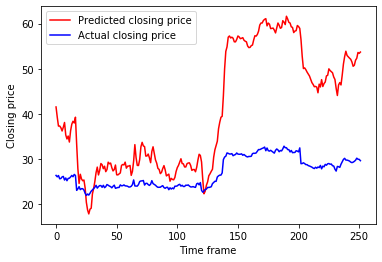

In [27]:
#Plots to find Predicted vs Actual closing price

plt.plot(y_pred , color = 'r' , label = 'Predicted closing price')
plt.plot(Y_test , color = 'b' , label = 'Actual closing price')
plt.xlabel('Time frame')
plt.ylabel('Closing price')
plt.legend()
plt.show()

__Conclusion__


Scores have slightly improved after changing some features. Still for a LSTM model (which usually works good for Time series forecasting), the scores are not up to the mark